# StackRush Analysis

## Overview of our analysis:

- we are going to see the progress of selected players of your choice through the evolution of their score game after game (Plot 1)
- we are going the progress of selected players of your choice through their accuracy evolution game after game (Plot 2)
- and finally to see more in depth we are going to see the accuracy of one chosen player through time in one chosen game only (Plot 3)



### First loading the data


In [2]:
import pandas as pd
from pathlib import Path
import numpy as np

Let's add the game number, names and mean values for the misplacement of blocks to setup for the rest of the plots

In [3]:
filepaths = [f for f in Path("./Players").iterdir() if f.suffix == '.csv']
dfs = []
for f in filepaths:
    df_temp = pd.read_csv(f)
    df_temp.insert(0, "names", f.stem)
    df_temp.insert(0, "game number", range(1, df_temp.shape[0] + 1))
    dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)
df['mean block width'] = df['block width difference'].apply(
    lambda x: np.mean([float(num) for num in str(x).split(',')]) if pd.notnull(x) else np.nan
)

In [4]:
display(df)

,game number,names,score,highscore,block width difference,mean block width
0,1,luk,3,3,"98, 98, 88",94.666667
1,2,luk,4,4,"70, 62, 47, 37",54.000000
2,1,manon,0,0,NaN,NaN
3,2,manon,0,2,"92, 90, 46",76.000000
4,1,timothe,1,1,70,70.000000
...,...,...,...,...,...,...
71,8,ryu,0,3,"70, 66, 52, 23, 43",50.800000
72,1,julien,0,0,NaN,NaN
73,2,julien,13,13,"96, 93, 92, 84, 70, 42, 27, 26, 24, 23, 11, 10, 8",46.615385
74,3,julien,1,13,98,98.000000


# Plotting

### The first two plots are similar in form but not in content but I wanted to keep the same form as I found it interesting to really visualize if a progression in score meant that the person augmented its reaction time !

### 1. First Plot

In [5]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

Click on Plot to plot the default players or select players amongst all players by clicking and pressing on shift


SelectMultiple(description='Players:', options=('luk', 'manon', 'timothe', 'pia', 'noa', 'stanley', 'lucien', …

Button(description='Plot', style=ButtonStyle())

No valid players selected, showing the first 10 players by default.


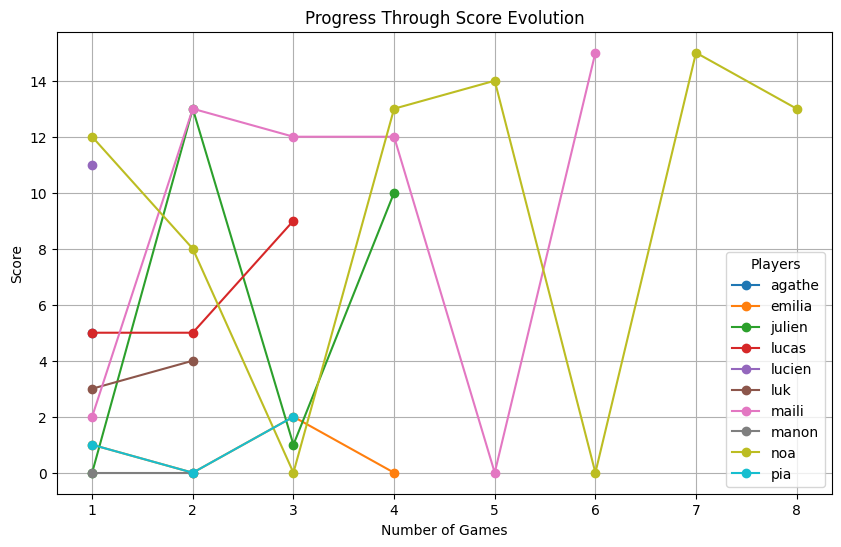

In [6]:
available_players = df['names'].unique()
print("Click on Plot to plot the default players or select players amongst all players by clicking and pressing on shift")
# Create a multi-select widget
player_selector = widgets.SelectMultiple(
    options=available_players,
    description='Players:',
    disabled=False
)
plot_button = widgets.Button(description="Plot")

# Function to plot the selected players
def plot_scores(button):
    plt.close('all')
    selected_players = list(player_selector.value)
    plt.figure(figsize=(10, 6))
    if not selected_players:
        print("No valid players selected, showing the first 10 players by default.")
        for i, (player, group) in enumerate(df.groupby('names')):
            if i >= 10: break
            plt.plot(group['game number'], group['score'], label=player, marker='o')
    else:
        for player, group in df[df['names'].isin(selected_players)].groupby('names'):
            plt.plot(group['game number'], group['score'], label=player, marker='o')
    
    plt.xlabel('Number of Games')
    plt.ylabel('Score')
    plt.title('Progress Through Score Evolution')
    plt.legend(title="Players")
    plt.grid(True)
    plt.show()

plot_button.on_click(plot_scores)
display(player_selector, plot_button)

### 2. Second Plot

### For the two last diagrams what I call inverse accuracy is actually how far the player is from the last block position which means that the bigger the error (block width difference with the last) the less the player is accurate

Click on Plot to plot the default players or select players amongst all players by clicking and pressing on shift


SelectMultiple(description='Players:', options=('luk', 'manon', 'timothe', 'pia', 'noa', 'stanley', 'lucien', …

Button(description='Plot', style=ButtonStyle())

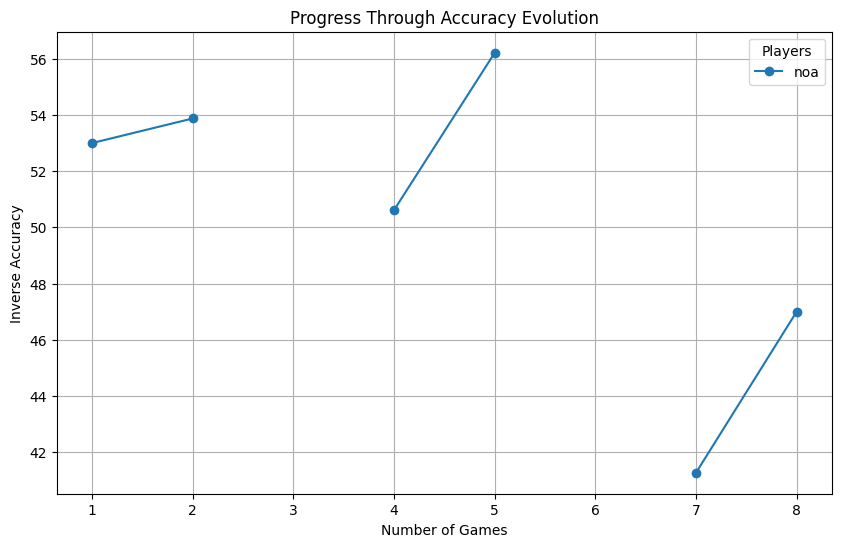

In [7]:
available_players = df['names'].unique()
print("Click on Plot to plot the default players or select players amongst all players by clicking and pressing on shift")
# Create a multi-select widget
player_selector = widgets.SelectMultiple(
    options=available_players,
    description='Players:',
    disabled=False
)
plot_button = widgets.Button(description="Plot")

# Function to plot the selected players
def plot_scores(button):
    plt.close('all')
    selected_players = list(player_selector.value)
    plt.figure(figsize=(10, 6))
    if not selected_players:
        print("No valid players selected, showing the first 10 players by default.")
        for i, (player, group) in enumerate(df.groupby('names')):
            if i >= 10: break
            plt.plot(group['game number'], group['mean block width'], label=player, marker='o')
    else:
        for player, group in df[df['names'].isin(selected_players)].groupby('names'):
            plt.plot(group['game number'], group['mean block width'], label=player, marker='o')
    
    plt.xlabel('Number of Games')
    plt.ylabel('Inverse Accuracy')
    plt.title('Progress Through Accuracy Evolution')
    plt.legend(title="Players")
    plt.grid(True)
    plt.show()

plot_button.on_click(plot_scores)
display(player_selector, plot_button)

### 3. Third Plot

Select a player amongst all players by clicking and select a game


SelectMultiple(description='Players:', options=('luk', 'manon', 'timothe', 'pia', 'noa', 'stanley', 'lucien', …

Dropdown(description='Game:', options=(np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int…

Button(description='Plot', style=ButtonStyle())

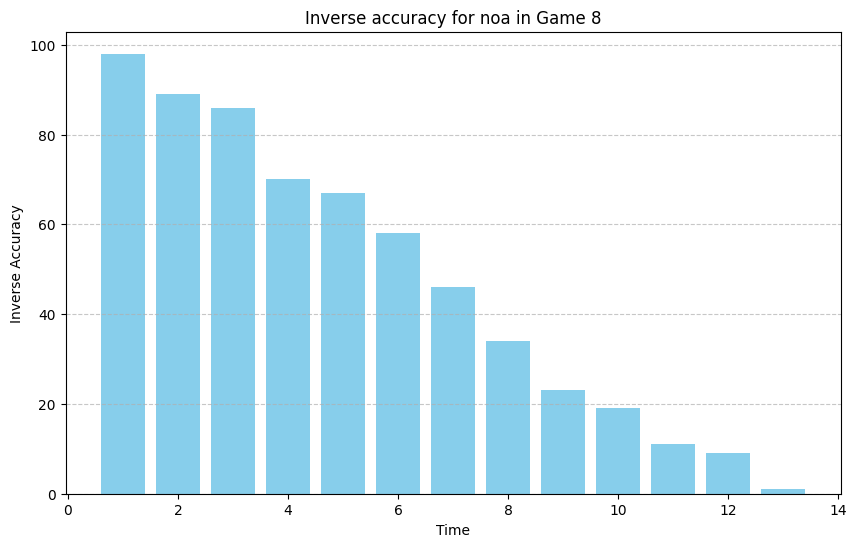

In [8]:
print("Select a player amongst all players by clicking and select a game")
game_selector = widgets.Dropdown(
    options=df['game number'].unique(),
    description='Game:',
    disabled=False
)

plot_button = widgets.Button(description="Plot")

def plot_block_diagram(button):

    selected_player = player_selector.value
    if isinstance(selected_player, tuple):
        selected_player = selected_player[0] 

    selected_game = game_selector.value
    selected_game = int(selected_game)
    filtered_df = df[
        (df['names'] == selected_player) & 
        (df['game number'] == selected_game)
    ]

    if filtered_df.empty:
        print("No data found for the selected player and game.")
        return

    block_widths = filtered_df['block width difference'].iloc[0]
    if pd.isnull(block_widths):
        print("No block width difference data available for this selection.")
        return
    
    block_widths = [float(num) for num in block_widths.split(',')]
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(block_widths) + 1), block_widths, color='skyblue')
    plt.xlabel('Time')
    plt.ylabel('Inverse Accuracy')
    plt.title(f'Inverse accuracy for {selected_player} in Game {selected_game}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



plot_button.on_click(plot_block_diagram)
display(player_selector, game_selector, plot_button)